**Yogesh Bhandare** *06*

Assignment 4 Clustering Analysis

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np

In [2]:
# 1. load the iris dataset
# the iris dataset is a standard scikit-learn dataset
iris = load_iris()
# we use only the feature data (sepal length, sepal width, petal length, petal width)
x = iris.data

In [3]:
# 2. implementation of the elbow method to find optimal k
wcss = [] # within-cluster sum of squares list
k_range = range(1, 11) # test for 1 to 10 clusters

# iterate through the range of k values
for k in k_range:
    # initialize kmeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    # fit the model to the data
    kmeans.fit(x)
    # append the wcss (also known as inertia) for the current k
    wcss.append(kmeans.inertia_)

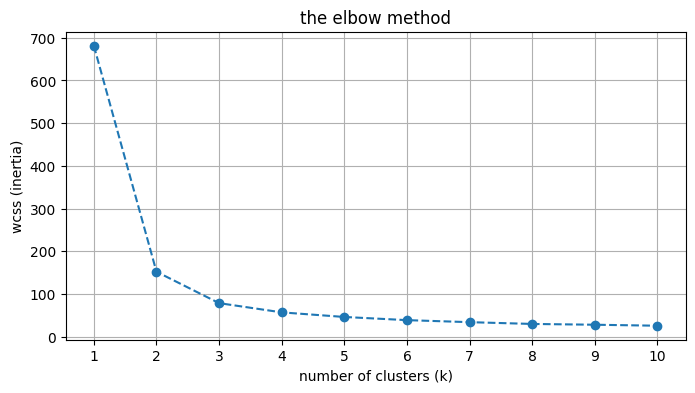

In [4]:
# 3. plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('the elbow method')
plt.xlabel('number of clusters (k)')
plt.ylabel('wcss (inertia)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [5]:
# 4. determine optimal k and apply final k-means model
# by observing the plot, the 'elbow' (the point where the decrease in wcss slows down)
# is clearly at k=3, which is the actual number of species in the iris dataset.
optimal_k = 3

# apply k-means with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
# fit the model and predict the cluster labels for each data point
cluster_labels = final_kmeans.fit_predict(x)

In [6]:
# 5. print results
print(f"\noptimal number of clusters determined by elbow method: {optimal_k}")
print(f"cluster centers (means) for k={optimal_k}:\n{final_kmeans.cluster_centers_}")


optimal number of clusters determined by elbow method: 3
cluster centers (means) for k=3:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
